In [1]:
import tensorflow as tf
from tensorflow.keras import Model,Input
from tensorflow.keras.models import load_model
import os
import pandas as pd
import numpy as np
import random as rd
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score
import joblib
import matplotlib.pyplot as plt
import librosa.display
import warnings
warnings.filterwarnings("ignore")

path_to_new_records = "D:\\Utilisateurs\\ENAC\\projet_AIRBUS\\test_records\\"
path_to_db_voice = "D:\\Utilisateurs\\ENAC\\projet_AIRBUS\\db\\voice\\"
path_to_db_plane = "D:\\Utilisateurs\\ENAC\\projet_AIRBUS\\db\\plane\\"
path_to_db_both = "D:\\Utilisateurs\\ENAC\\projet_AIRBUS\\db\\both\\"

In [74]:
# r0,s0 = librosa.load("record_0.wav")

r1,s1 = librosa.load(path_to_new_records + "Record_707.wav")
# r2,s2 = librosa.load(path_to_new_records + "Record_734.wav")
# r3,s3 = librosa.load(path_to_new_records + "Record_821.wav")
# r4,s4 = librosa.load("recordings/record_10.wav")

#pas de temps de 2.3s

In [75]:
spectrum = librosa.stft(y=r1,center=True) 
spectrum = librosa.amplitude_to_db(spectrum)
n_morceaux = spectrum.shape[1]//100
# to_predict = [librosa.amplitude_to_db(spectrum[:,j*100:(j+1)*100]) for j in range(n_morceaux)]

In [76]:


to_predict = np.array([spectrum[:,j*100:(j+1)*100] for j in range(n_morceaux)])
# X_test_t = np.array([k.transpose() for k in to_predict])

In [77]:
# conv = load_model('Conv2D_3.h5')
lstm = load_model('LSTM_2.h5')

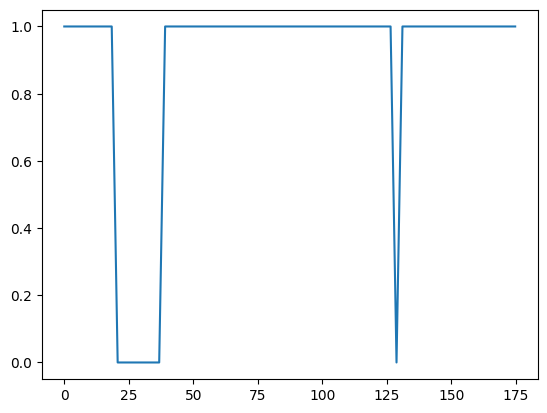

In [78]:
t = [i*2.3 for i in range(n_morceaux)]
# print(lstm(X_test_t))
plt.plot(t,np.around(conv(to_predict)))
plt.show()

In [79]:
pred = np.around(conv(to_predict))
sum(pred)/len(pred)

array([0.8831169], dtype=float32)